In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier, Lasso
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC

from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle

from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle


In [3]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [4]:
mrna_df =pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/capstone2.mrn_df2.csv')
df = pd.read_csv('/Users/cp/Documents/dsi/capstone2/capstone2/data/METABRIC_RNA_Mutation.csv')


/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
death_from_dict = {
    'Living':0
    ,'Died of Other Causes':0
    ,'Died of Disease':1
}
df.replace(death_from_dict, inplace =True)
mrna_df['death_from_cancer'] = df.death_from_cancer



In [6]:
mrna_df.death_from_cancer.fillna(0, inplace = True)

In [7]:
# mrna_df = np.random.shuffle(mrna_df.values)
mrna_df = shuffle(mrna_df)

In [8]:
mrna_df 

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,death_from_cancer
1790,1.5168,-1.8925,-0.7698,1.5281,2.2336,-0.0505,0.4120,0.2913,-1.7848,1.6076,...,-0.9631,-0.9436,2.1672,0.3065,0.5586,2.5915,-0.4279,1.5318,-0.8474,1.0
1757,-0.0134,0.6644,-0.5336,0.5190,0.1878,-1.3654,-0.0335,-1.0429,0.8029,1.0549,...,-0.3211,0.6138,-0.8163,-0.3615,1.0446,1.3453,-0.3457,0.9159,-0.0023,0.0
51,-0.0616,0.1084,-0.6249,0.2310,0.0583,-0.1163,1.4386,-0.1129,1.4486,-0.6146,...,0.1824,-0.6832,2.3282,-0.1932,0.7465,1.5975,-0.3323,-0.2872,-0.7392,0.0
1624,-0.4585,1.0126,1.8303,-1.1746,-0.6703,-0.5445,-0.4007,2.2545,-1.2164,0.8849,...,-0.3841,-0.8886,-0.4274,0.5903,0.4222,0.0320,-0.4499,0.7484,-0.7613,0.0
390,0.4022,-1.5537,-0.7546,-0.0122,-0.9086,0.0591,0.5064,-0.3064,-1.0644,-0.5811,...,-0.9064,-0.2301,-0.0833,1.6343,-0.8361,0.0169,0.2106,0.0843,0.5731,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,-0.7409,-0.5378,-1.1054,0.3454,0.5465,-0.5482,0.6663,-0.8061,1.1580,-1.2843,...,-0.7180,0.4448,-0.7685,0.6235,-1.0950,-1.3931,0.1116,0.4005,2.2408,0.0
979,-1.1791,0.2061,-0.6906,1.1909,-0.6028,0.0193,-0.7066,-0.8460,0.8521,1.1152,...,-0.2359,-0.5447,1.2397,-0.6940,-0.0944,0.1742,-0.4224,-0.3538,-0.6395,0.0
902,0.6199,1.5865,1.4499,1.0206,-0.0843,-1.4706,0.1384,-0.7174,-0.6664,0.2897,...,-0.8604,0.1061,-0.4794,0.4129,0.8962,0.1676,-0.6055,0.5475,-0.7016,0.0
564,0.4670,1.9303,-0.0923,2.0163,-1.0900,-0.9410,-0.3857,-2.6887,-1.4730,-1.1766,...,0.3657,-0.9468,-0.5793,-0.4237,0.2870,-1.2957,-0.5544,-1.0656,-0.6982,0.0


In [9]:
# Validation_set = mrna_df[:200]
# mrna1 = mrna_df[200:]

In [17]:
len(Validation_set)
len(mrna1)

200

In [15]:
# Validation_set.to_csv(r'../data/validation_set.csv', index = False)
len

In [19]:

y = mrna1.pop('death_from_cancer')
X = mrna1

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify = y)
# X_train2, X_test, y_train2, y_test = train_test_split(X_train.copy(), y_train.copy(), test_size=0.10, random_state=1)

In [300]:
gradient_boosting_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
                         ,'max_depth': [2, 4, 8]
                         ,'subsample': [0.25, 0.5, 0.75, 1.0]
                         ,'min_samples_leaf': [1, 2, 4]
                         ,'max_features': ['sqrt', 'log2', None]
                         ,'n_estimators': [5,10,25,50,100,200]}

random_forest_grid = {'max_depth': [2, 4, 8]
                     ,'max_features': ['sqrt', 'log2', None]
                     ,'min_samples_leaf': [1, 2, 4]
                     ,'min_samples_split': [2, 4]
                     ,'bootstrap': [True, False]
                     ,'class_weight': ['balanced']

                     ,'n_estimators': [5,10,25,50,100,200]}

logistic_regression_grid = {'Cs':[2,5,10, 25, 100, 200]
                       ,'cv':[4]
                       ,'solver':['liblinear']#'lbfgs',
#                        ,'max_iter' : [50]
                       ,'class_weight':['balanced']
                       ,'penalty':['l1'] #, 'l2', 'elasticnet'
                            
#                         }
logistic2_regression_grid = {'C':[0.0305,0.03055, 0.03060, 0.03065, 0.0307, 0.03075, 0.03077]
#                        ,'cv':[4]
                       ,'solver':['liblinear']#'lbfgs',
#                        ,'max_iter' : [50]
                       ,'class_weight':['balanced']
                       ,'penalty':['l1']} #, 'l2', 'elasticnet'
    
svm_grid = {'C':[0.5, 1, 2]

                       ,'kernel':['rbf', 'liblinear']}

ada_grid = {'base_estimator': [DecisionTreeClassifier(class_weight='balanced')], \
                  'n_estimators': [100, 250], \
                  'learning_rate': [0.1, 0.25]}


sgd_grid = {'loss': ['hinge', 'log', 'modified_huber'], \
                      'alpha': [0.001, 0.01], \
                      'penalty': ['l1'], \
                      'max_iter': [5, 10, 25], \
                      'class_weight': ['balanced']}



SyntaxError: invalid syntax (<ipython-input-300-e667fa1ad24a>, line 25)

In [301]:


# logistic_randomsearch = RandomizedSearchCV(LogisticRegressionCV()
#                                               ,logistic_regression_grid
#                                               ,n_jobs=-1
#                                               ,verbose=False
#                                               ,scoring='roc_auc')

logistic2_randomsearch = RandomizedSearchCV(LogisticRegression()
                                              ,logistic2_regression_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

logistic2_gridsearch = GridSearchCV(LogisticRegression()
                                          ,logistic2_regression_grid
                                          ,n_jobs=-1
                                          ,verbose=False
                                          ,scoring='roc_auc')



svm_randomsearch = RandomizedSearchCV(SVC(gamma = 'auto')
                                              ,svm_grid
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

gradient_randomsearch = RandomizedSearchCV(GradientBoostingClassifier()
                                          ,gradient_boosting_grid
                                          ,n_jobs=-1
                                          ,verbose=False
                                          ,scoring='roc_auc')

random_foreset_randomsearch = RandomizedSearchCV(RandomForestClassifier()
                                                ,random_forest_grid
                                                ,n_jobs=-1
                                                ,verbose=False
                                                ,scoring='roc_auc')

ada_randomsearch = RandomizedSearchCV(AdaBoostClassifier()
                                                ,ada_grid
                                                ,n_jobs=-1
                                                ,verbose=False
                                                ,scoring='roc_auc')

SGD_randomsearch = RandomizedSearchCV(SGDClassifier()
                                                ,sgd_grid
                                                ,n_jobs=-1
                                                ,verbose=False
                                                ,scoring='roc_auc')





In [205]:
# logistic_randomsearch.fit(X_train, y_train)
# print(f"Best logistic Parameters: {logistic_randomsearch.best_params_}")
# print(f"Best logistic Model: {logistic_randomsearch.best_estimator_}")
# print(f"Best logistic Score: {logistic_randomsearch.best_score_:.4f}")

logistic2_randomsearch.fit(X_train, y_train)
print(f"Best logistic Parameters: {logistic2_randomsearch.best_params_}")
print(f"Best logistic Model: {logistic2_randomsearch.best_estimator_}")
print(f"Best logistic Score: {logistic2_randomsearch.best_score_:.4f}")

logistic2_gridsearch.fit(X_train, y_train)
print(f"Best GRID logistic Parameters: {logistic2_gridsearch.best_params_}")
print(f"Best GRID logistic Model: {logistic2_gridsearch.best_estimator_}")
print(f"Best GRID logistic Score: {logistic2_gridsearch.best_score_:.4f}")




# svm_randomsearch.fit(X_train, y_train)
# print(f"Best svm Parameters: {svm_randomsearch.best_params_}")
# print(f"Best svm Model: {svm_randomsearch.best_estimator_}")
# print(f"Best svm Score: {svm_randomsearch.best_score_:.4f}")

# gradient_randomsearch.fit(X_train, y_train)
# print(f"Best Gradient Parameters: {gradient_randomsearch.best_params_}")
# print(f"Best Gradient Model: {gradient_randomsearch.best_estimator_}")
# print(f"Best Gradient Score: {gradient_randomsearch.best_score_:.4f}")

# random_foreset_randomsearch.fit(X_train, y_train)
# print(f"Best Random Forest Parameters: {random_foreset_randomsearch.best_params_}")
# print(f"Best Random Forest Model: {random_foreset_randomsearch.best_estimator_}")
# print(f"Best Random Forest Score: {random_foreset_randomsearch.best_score_:.4f}")


# ada_randomsearch.fit(X_train, y_train)
# print(f"Best Random adaboost Parameters: {ada_randomsearch.best_params_}")
# print(f"Best Random adaboost Model: {ada_randomsearch.best_estimator_}")
# print(f"Best Random adaboost Score: {ada_randomsearch.best_score_:.4f}")

# SGD_randomsearch.fit(X_train, y_train)
# print(f"Best Random SGD Parameters: {SGD_randomsearch.best_params_}")
# print(f"Best Random SGD Model: {SGD_randomsearch.best_estimator_}")
# print(f"Best Random SGD Score: {SGD_randomsearch.best_score_:.4f}")




/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best logistic Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.0307}
Best logistic Model: LogisticRegression(C=0.0307, class_weight='balanced', penalty='l1',
                   solver='liblinear')
Best logistic Score: 0.6585
Best GRID logistic Parameters: {'C': 0.0307, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best GRID logistic Model: LogisticRegression(C=0.0307, class_weight='balanced', penalty='l1',
                   solver='liblinear')
Best GRID logistic Score: 0.6584


In [209]:
# logistic_best_model = logistic_randomsearch.best_estimator_
# logistic_y_hats = logistic_best_model.predict(X_test)
# print(f"logistic ROC Score = {roc_auc_score(y_test, logistic_y_hats):.4f}")

logistic2_best_model = logistic2_randomsearch.best_estimator_
logistic2_y_hats = logistic2_best_model.predict(X_test)
print(f"logistic2 ROC Score = {roc_auc_score(y_test, logistic2_y_hats):.4f}")

logisticGrid_best_model = logistic2_gridsearch.best_estimator_
logisticGrid_y_hats = logisticGrid_best_model.predict(X_test)
print(f"logistic GRID ROC Score = {roc_auc_score(y_test, logisticGrid_y_hats):.4f}")

# svm_best_model = svm_randomsearch.best_estimator_
# svm_y_hats = svm_best_model.predict(X_test)
# print(f"SVM ROC Score = {roc_auc_score(y_test, svm_y_hats):.4f}")

# gradient_best_model = gradient_randomsearch.best_estimator_
# gy_hats = gradient_best_model.predict(X_test)
# print(f"Gradient ROC Score = {roc_auc_score(y_test, gy_hats):.4f}")

# random_forest_best_model = random_foreset_randomsearch.best_estimator_
# ry_hats = random_forest_best_model.predict(X_test)
# print(f"Random Forest ROC Score = {roc_auc_score(y_test, ry_hats):.4f}")




# ada_boost_best_model = ada_randomsearch.best_estimator_
# ada_y_hats = ada_boost_best_model.predict(X_test)
# print(f"Random Adaboost ROC Score = {roc_auc_score(y_test, ada_y_hats):.4f}")

# SGD_best_model = SGD_randomsearch.best_estimator_
# SGD_y_hats = SGD_best_model.predict(X_test)
# print(f"Random SGD ROC Score = {roc_auc_score(y_test, SGD_y_hats):.4f}")



logistic2 ROC Score = 0.6065
logistic GRID ROC Score = 0.6065


In [299]:
# filename = 'logistic_best_model3_grid_search.sav'
# pickle.dump(logisticGrid_best_model, open(filename, 'wb'))

In [207]:
# lst =X_train.shape,X_train2.shape, X_test.shape, X_val.shape
# print(lst)

In [210]:
# print(classification_report(y_test, logistic_y_hats))

print(classification_report(y_test, logistic2_y_hats))
print(f' GRID SEARCH {classification_report(y_test, logisticGrid_y_hats)}')
# print(classification_report(y_test, svm_y_hats))
# print(classification_report(y_test, gy_hats))
# print(classification_report(y_test, ry_hats))
# print(classification_report(y_test, ada_y_hats))
# print(classification_report(y_test, SGD_y_hats))


              precision    recall  f1-score   support

         0.0       0.77      0.56      0.65       172
         1.0       0.42      0.65      0.51        84

    accuracy                           0.59       256
   macro avg       0.59      0.61      0.58       256
weighted avg       0.65      0.59      0.60       256

 GRID SEARCH               precision    recall  f1-score   support

         0.0       0.77      0.56      0.65       172
         1.0       0.42      0.65      0.51        84

    accuracy                           0.59       256
   macro avg       0.59      0.61      0.58       256
weighted avg       0.65      0.59      0.60       256



In [211]:
# print(accuracy_score(y_test, logistic_y_hats))
print(accuracy_score(y_test, logistic2_y_hats))

# print(accuracy_score(y_test, svm_y_hats))
# print(accuracy_score(y_test, gy_hats))
# print(accuracy_score(y_test, ry_hats))
# print(accuracy_score(y_test, ada_y_hats))
# print(accuracy_score(y_test, SGD_y_hats))

0.58984375


In [229]:
logistic_coefs = logisticGrid_best_model.coef_
log_coef_reshape = logistic_coefs.reshape(489, -1)

In [239]:
# logisticGrid_best_model.coef_[]
lst_coefs = []
for name, coef in zip(X.columns[1:], logisticGrid_best_model.coef_[0]):
#     if logisticGrid_best_model.coef_[0] !=0.0000:
    lst_coefs.append((name, coef))
    print("{0}: {1:0.4f}".format(name, coef))
    

brca2: 0.0000
palb2: 0.0000
pten: 0.0000
tp53: 0.0000
atm: -0.0046
cdh1: 0.0000
chek2: 0.0000
nbn: 0.0000
nf1: 0.0000
stk11: 0.0000
bard1: 0.0000
mlh1: 0.0000
msh2: -0.0310
msh6: 0.0000
pms2: 0.0000
epcam: -0.0612
rad51c: 0.0000
rad51d: 0.0000
rad50: 0.0000
rb1: 0.0000
rbl1: 0.0000
rbl2: 0.0000
ccna1: 0.0000
ccnb1: 0.0000
cdk1: 0.0732
ccne1: 0.0000
cdk2: 0.0000
cdc25a: 0.0000
ccnd1: 0.0000
cdk4: 0.0000
cdk6: 0.0000
ccnd2: 0.0000
cdkn2a: 0.0000
cdkn2b: 0.0000
myc: 0.0000
cdkn1a: 0.0000
cdkn1b: 0.0000
e2f1: 0.0000
e2f2: 0.0000
e2f3: 0.0000
e2f4: 0.0000
e2f5: 0.0000
e2f6: 0.0000
e2f7: 0.0000
e2f8: 0.0000
src: 0.0000
jak1: 0.0000
jak2: 0.0000
stat1: 0.0000
stat2: 0.0000
stat3: 0.0000
stat5a: 0.0000
stat5b: -0.2342
mdm2: 0.0000
tp53bp1: 0.0000
adam10: 0.0000
adam17: 0.0000
aph1a: 0.0000
aph1b: 0.0000
arrdc1: 0.0000
cir1: 0.0000
ctbp1: 0.0000
ctbp2: 0.0000
cul1: 0.0000
dll1: 0.0000
dll3: 0.0000
dll4: 0.0000
dtx1: 0.0000
dtx2: 0.0000
dtx3: 0.0000
dtx4: 0.0000
ep300: 0.0000
fbxw7: 0.0000
hdac1

In [252]:
# df_vif_2 = pd.DataFrame(log_coef_reshape, index = [X.columns], columns =['VIF value'] )
# df_vif_2
# vif_dict = dict(zip(X.columns, logistic_coefs))
# vif_dict

lst_coefs
vif_dict = {}
for i in lst_coefs:
    if i[1] != 0:
        vif_dict[i[0]] = i[1]

vif_dict         
#     print (i[0])

{'atm': -0.004597114034021325,
 'msh2': -0.03102942516165803,
 'epcam': -0.0612317109866292,
 'cdk1': 0.07322380275764322,
 'stat5b': -0.23416228934777827,
 'itch': 0.004299907272657238,
 'notch3': -0.01924880718643598,
 'nrarp': 0.03771149647063337,
 'acvr2a': -0.03257830151475241,
 'bad': 0.19847502140542078,
 'bmp4': 0.02361642353551141,
 'dlec1': -0.12324513701190784,
 'dph1': -0.017471461002504542,
 'egfr': -0.036859557840558325,
 'hif1a': 0.002001317356793749,
 'inha': -0.02638221493160968,
 'mmp10': -0.03907688758960513,
 'mmp12': 0.029318549064596813,
 'mmp19': 0.03017953655321111,
 'mmp26': -0.057805317146891924,
 'pdgfra': 0.062356458884458975,
 'smad7': 0.029769019483351623,
 'arid1b': -0.02330830287649607,
 'abcb1': -0.03545444048911395,
 'nr1i2': -0.11591531315637571,
 'alk': -0.0026816698091922287,
 'birc6': 0.0028661847913567006,
 'flt3': 0.01457283646106561,
 'nek1': 0.01596913274552478,
 'nr3c1': 0.036880147994744206,
 'prkacg': -0.0010573049471318103,
 'prr16': -0.017

<BarContainer object of 37 artists>

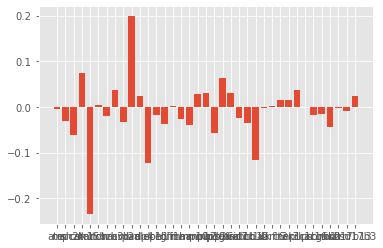

In [250]:



plt.bar(vif_dict.keys(), vif_dict.values())

In [258]:
vif_df_ordered = pd.DataFrame.from_dict(vif_dict, orient='index')
vif_df_ordered

,0
atm,-0.004597
msh2,-0.031029
epcam,-0.061232
cdk1,0.073224
stat5b,-0.234162
itch,0.004300
notch3,-0.019249
nrarp,0.037711
acvr2a,-0.032578
bad,0.198475


In [267]:
vif_df_ordered.sort_values(by =0, inplace = True)
vif_df_ordered[1] = vif_df_ordered.index
vif_df_ordered

,0,1
stat5b,-0.234162,stat5b
dlec1,-0.123245,dlec1
nr1i2,-0.115915,nr1i2
epcam,-0.061232,epcam
mmp26,-0.057805,mmp26
sik2,-0.043356,sik2
mmp10,-0.039077,mmp10
egfr,-0.036860,egfr
abcb1,-0.035454,abcb1
acvr2a,-0.032578,acvr2a


No handles with labels found to put in legend.


[]

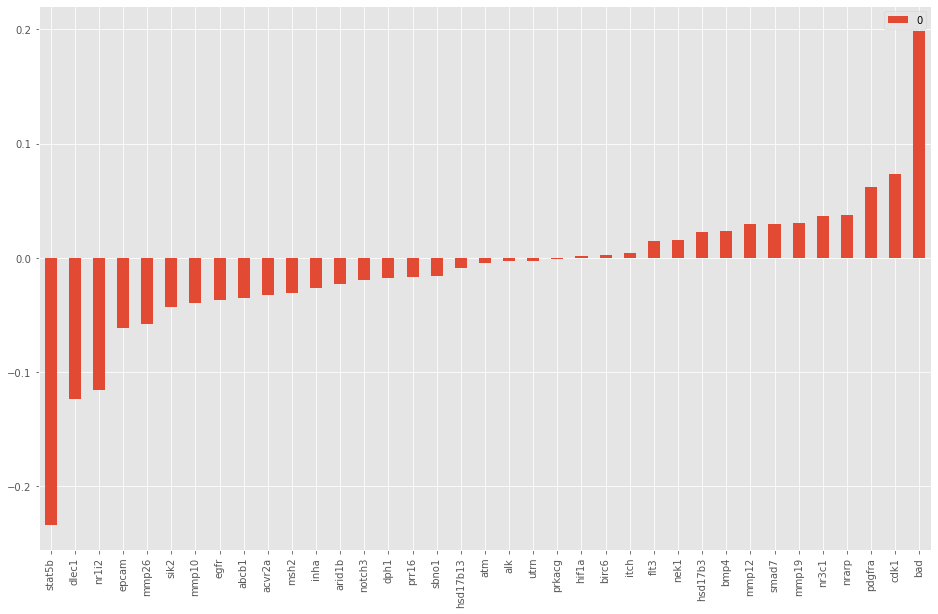

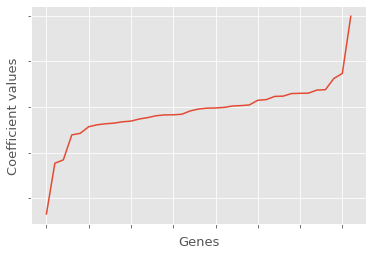

In [294]:
# fig, ax = plt.subplots()
# ax.bar()
# ax.plot(activity, cat, label="cat")
# ax.legend()

# plt.show()
vif_df_ordered.plot.bar(figsize = (16,10))
vif_df_ordered.plot(legend=None)
plt.xlabel("Genes", fontsize = 13)
plt.ylabel("Coefficient values", fontsize = 13)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
ax.legend().set_visible(False)
plt.plot(lgend = None)



# Plotting ROC Curve

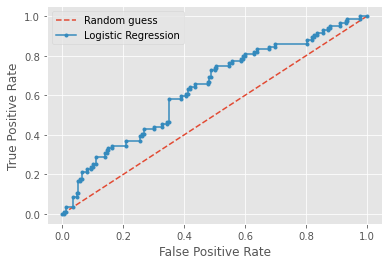

In [212]:

logistic2_best_model.fit(X_train, y_train)
# predict probabilities
yhat = logistic2_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='Random guess')
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.savefig("Logistic Regression_ROC_curve.png", dpi=200)
plt.show()



from sklearn import metrics
# preds =logistic_best_model.predict_proba(X_test)
# tpr, tpr, thresholds = metrics.roc_curve(y_test,preds[:,1])
# print (thresholds)

# accuracy_ls = []
# for thres in thresholds:
#     y_pred = np.where(preds[:,1]>thres,1,0)
#     # Apply desired utility function to y_preds, for example accuracy.
#     accuracy_ls.append(metrics.recall_score(y_test, y_pred))
# accuracy_ls

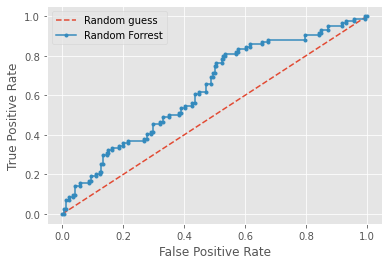

In [53]:

random_forest_best_model.fit(X_train, y_train)
# predict probabilities
yhat = random_forest_best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='Random guess')
plt.plot(fpr, tpr, marker='.', label='Random Forrest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.savefig("Random_Forrest_ROC_curve.png", dpi=200)
plt.show()



from sklearn import metrics
# preds =logistic_best_model.predict_proba(X_test)
# tpr, tpr, thresholds = metrics.roc_curve(y_test,preds[:,1])
# print (thresholds)

# accuracy_ls = []
# for thres in thresholds:
#     y_pred = np.where(preds[:,1]>thres,1,0)
#     # Apply desired utility function to y_preds, for example accuracy.
#     accuracy_ls.append(metrics.recall_score(y_test, y_pred))
# accuracy_ls

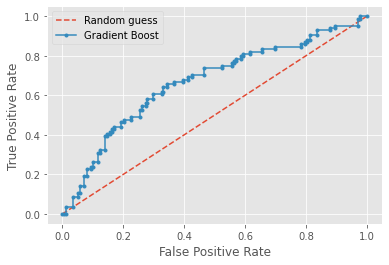

In [81]:

loaded_model.fit(X_train, y_train)
# predict probabilities
yhat = loaded_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='Random guess')
plt.plot(fpr, tpr, marker='.', label='Gradient Boost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.savefig("Gradient_boost_ROC_curve.png", dpi=200)
plt.show()



from sklearn import metrics
# preds =logistic_best_model.predict_proba(X_test)
# tpr, tpr, thresholds = metrics.roc_curve(y_test,preds[:,1])
# print (thresholds)

# accuracy_ls = []
# for thres in thresholds:
#     y_pred = np.where(preds[:,1]>thres,1,0)
#     # Apply desired utility function to y_preds, for example accuracy.
#     accuracy_ls.append(metrics.recall_score(y_test, y_pred))
# accuracy_ls

In [ ]:
# validate_lg_y_hat = logistic_best_model.predict(X_val)
# validate_svm_y_hat = svm_best_model.predict(X_val)
# validate_gb_y_hat = gradient_best_model.predict(X_val)
# validate_rf_y_hat = random_forest_best_model.predict(X_val)
validate_ada_y_hat = ada_boost_best_model.predict(X_val)
validate_SGD_y_hat = SGD_best_model.predict(X_val)


In [ ]:
# print(accuracy_score(y_val, validate_lg_y_hat))
# print(accuracy_score(y_val, validate_svm_y_hat))
# print(accuracy_score(y_val, validate_gb_y_hat))
# print(accuracy_score(y_val, validate_rf_y_hat))
print(accuracy_score(y_val, validate_ada_y_hat))
print(accuracy_score(y_val, validate_SGD_y_hat))




In [ ]:


# print(classification_report(y_val, validate_lg_y_hat))
# print(classification_report(y_val, validate_svm_y_hat))
# print(classification_report(y_val, validate_gb_y_hat))
# print(classification_report(y_val, validate_rf_y_hat))
print(classification_report(y_val, validate_ada_y_hat))
print(classification_report(y_val, validate_SGD_y_hat))


In [ ]:
# filename = 'random_forrest_model1.sav'
# pickle.dump(random_forest_best_model, open(filename, 'wb'))

In [ ]:
# filename = 'gradient_best_model1.sav'
# pickle.dump(gradient_best_model, open(filename, 'wb'))

In [ ]:
# filename = 'svm_best_model1.sav'
# pickle.dump(svm_best_model, open(filename, 'wb'))

In [ ]:
# filename = 'logistic_best_model1.sav'
# pickle.dump(logistic_best_model, open(filename, 'wb'))

In [50]:
pca = PCA(n_components = 0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)


(1448, 238)
(256, 238)


160 features explain around 75% of the variance. From 489 features to 160, not too bad.


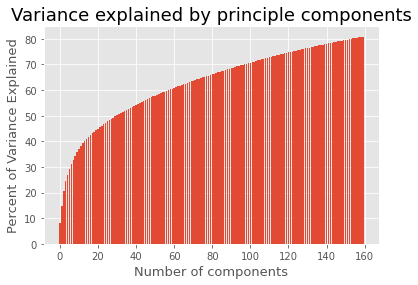

In [51]:
total = sum(pca.explained_variance_)
k = 0
current_variance = 0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k = k + 1
    
print(k, " features explain around 75% of the variance. From 489 features to ", k, ", not too bad.", sep='')

pca = PCA(n_components=k)
X_train.pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

var_exp = pca.explained_variance_ratio_.cumsum()
var_exp = var_exp*100
plt.bar(range(k), var_exp)
plt.xlabel("Number of components", fontsize = 13)
plt.ylabel("Percent of Variance Explained", fontsize = 13)
# fig.suptitle('test title', fontsize=20)

plt.title("Variance explained by principle components", fontsize=18)
# plt.set_ylabel('Patient Count');
# plt.savefig("PCA_component_variance.png", dpi=200)

In [ ]:
X_test.shape

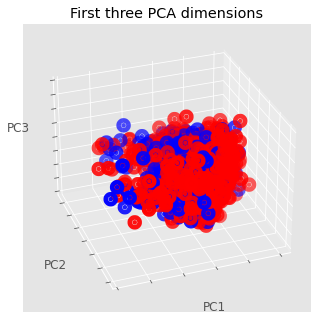

In [52]:
pca3 = PCA(n_components = 3).fit_transform(X_train)
colors = np.where(y_train==0, 'red', 'blue')
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(pca3[:, 0], pca3[:, 1], pca3[:, 2], c=colors, cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("PC1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC3")
ax.w_zaxis.set_ticklabels([])
# plt.savefig("PCA_first_3_plt.png", dpi=200)
plt.show()


In [ ]:
logistic_regression_grid2 = {'Cs':[2, 5]
                       ,'cv':[2,4,8]
                       ,'solver':['lbfgs', 'liblinear']
                       ,'max_iter' : [50]
                       ,'penalty':['l1', 'l2', 'elasticnet']
                           }

In [ ]:
logistic_randomsearch2 = RandomizedSearchCV(LogisticRegressionCV()
                                              ,logistic_regression_grid2
                                              ,n_jobs=-1
                                              ,verbose=False
                                              ,scoring='roc_auc')

In [ ]:
# logRegRidge = LogisticRegressionCV(penalty='l2', max_iter=100)
# logRegRidge.fit(X_train2, y_train2)
# print(f'Ridge Coefficients:{logRegRidge.coef_}')
    
# logReg_pred_p = logRegRidge.predict_proba(X_test)
# y_pred = logRegRidge.predict(X_test)
    
# Lasso

log_Reg_Lasso = LogisticRegressionCV(max_iter=200)
log_Reg_Lasso.fit(X_train, y_train)
print(f'Lasso Coefficients:{log_Reg_Lasso.coef_}')
    
log_Reg_Lasso_pred_p = log_Reg_Lasso.predict_proba(X_test)
y_pred = log_Reg_Lasso.predict(X_test) 








# logistic_randomsearch2.fit(X_train2, y_train2)
# print(f"Best logistic Parameters: {logistic_randomsearch2.best_params_}")
# print(f"Best logistic Model: {logistic_randomsearch2.best_estimator_}")
# print(f"Best logistic Score: {logistic_randomsearch2.best_score_:.4f}")


# # logRegRidge = LogisticRegressionCV(penalty='l2', max_iter=200)
# # logRegRidge.fit(X_train, y_train)
# print(f'LogisticRegression Coefficients:{logistic_randomsearch2.coef_}')
    
# logReg_pred_p = logistic_randomsearch2.predict_proba(X_test)
# y_pred = logistic_randomsearch2.predict(X_test)
#_______________________________________________________________________    
# Lasso

# log_Reg_Lasso = LogisticRegressionCV(max_iter=200)
# log_Reg_Lasso.fit(X_train, y_train)
# print(f'Lasso Coefficients:{log_Reg_Lasso.coef_}')
    
# log_Reg_Lasso_pred_p = log_Reg_Lasso.predict_proba(X_test)
# y_pred = log_Reg_Lasso.predict(X_test) 

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
logistic_randomsearch2.fit(X_train, y_train)

logistic_best_model2 = logistic_randomsearch2.best_estimator_
logistic2_y_hats = logistic_best_model2.predict(X_test)
print(f"Gradient ROC Score = {roc_auc_score(y_test, logistic2_y_hats):.4f}")

In [ ]:
print(classification_report(y_test, logistic2_y_hats))

In [ ]:
# y.to_csv(r'capstone2/data/target_death_col.csv', index = False)

In [ ]:
!pwd


In [ ]:


ada_randomsearch.fit(X_train, y_train)
print(f"Best Random adaboost Parameters: {ada_randomsearch.best_params_}")
print(f"Best Random adaboost Model: {ada_randomsearch.best_estimator_}")
print(f"Best Random adaboost Score: {ada_randomsearch.best_score_:.4f}")

In [65]:
loaded_model = pickle.load(open('/Users/cp/Documents/dsi/capstone2/capstone2/models/gradient_best_model1.sav', 'rb'))
result = loaded_model.score(X_test, y_test)

In [66]:
print(result)

0.96875


In [67]:
y2_loaded = loaded_model.predict(X_test)

In [68]:
print(classification_report(y_test, y2_loaded))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       172
         1.0       1.00      0.90      0.95        84

    accuracy                           0.97       256
   macro avg       0.98      0.95      0.96       256
weighted avg       0.97      0.97      0.97       256



In [71]:
loaded_model.feature_importances_

array([4.21432860e-04, 3.18110767e-03, 4.43293548e-03, 7.57965237e-03,
       4.15880174e-04, 3.49477616e-03, 3.86099570e-04, 1.39507574e-03,
       2.80301869e-03, 5.60075498e-04, 1.30554772e-03, 1.58027107e-03,
       5.87873335e-03, 2.03739777e-03, 8.56255564e-04, 1.51945042e-03,
       2.57987088e-03, 3.41984541e-03, 1.24239310e-03, 2.63371586e-03,
       1.43502921e-03, 2.99351808e-03, 1.26359050e-03, 1.71539435e-04,
       1.16297407e-03, 2.37949685e-04, 2.41549325e-03, 9.97144287e-04,
       4.75907828e-04, 2.71767536e-05, 3.81225179e-03, 1.24185252e-03,
       1.07975345e-03, 1.71736667e-04, 4.10246116e-03, 1.13367434e-03,
       1.95075091e-03, 3.15009951e-06, 3.43374220e-04, 1.53546555e-03,
       5.60933027e-03, 1.17140535e-03, 1.84082363e-03, 2.15095834e-03,
       5.81867789e-03, 7.50391738e-03, 2.95691308e-04, 8.67586625e-04,
       1.59112588e-03, 3.57662005e-03, 9.80573444e-04, 4.58337595e-04,
       1.39838944e-02, 8.72372093e-03, 1.22464714e-03, 2.38660295e-03,
      

Feature ranking:
1. feature 120 (0.060101)
2. feature 376 (0.019487)
3. feature 52 (0.013984)
4. feature 174 (0.012359)
5. feature 224 (0.009974)
6. feature 487 (0.009789)
7. feature 379 (0.008975)
8. feature 53 (0.008724)
9. feature 3 (0.007580)
10. feature 204 (0.007552)
11. feature 45 (0.007504)
12. feature 348 (0.007274)
13. feature 210 (0.006914)
14. feature 443 (0.006914)
15. feature 78 (0.006695)
16. feature 64 (0.006342)
17. feature 346 (0.006186)
18. feature 237 (0.006024)
19. feature 176 (0.005918)
20. feature 12 (0.005879)
21. feature 265 (0.005839)
22. feature 44 (0.005819)
23. feature 413 (0.005817)
24. feature 121 (0.005797)
25. feature 197 (0.005776)
26. feature 435 (0.005774)
27. feature 209 (0.005764)
28. feature 40 (0.005609)
29. feature 145 (0.005609)
30. feature 350 (0.005497)
31. feature 168 (0.005470)
32. feature 281 (0.005423)
33. feature 317 (0.005409)
34. feature 480 (0.005376)
35. feature 271 (0.005325)
36. feature 239 (0.005120)
37. feature 260 (0.005043)
38.

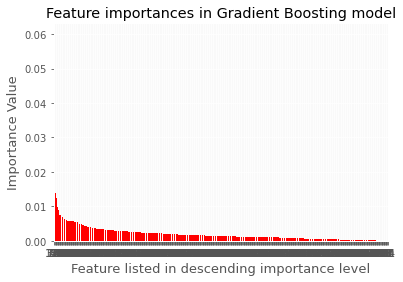

In [77]:
importances = loaded_model.feature_importances_
std = np.std([loaded_model.feature_importances_ for tree in random_forest_best_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances in Gradient Boosting model")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature listed in descending importance level", fontsize = 13)
plt.ylabel("Importance Value", fontsize = 13)
plt.savefig("gradient_boost_feature_importance.png", dpi=200)
plt.show()

Feature ranking:
1. feature 120 (0.085668)
2. feature 26 (0.084377)
3. feature 52 (0.079034)
4. feature 12 (0.022371)
5. feature 39 (0.016494)
6. feature 149 (0.016344)
7. feature 302 (0.016030)
8. feature 174 (0.013164)
9. feature 45 (0.011767)
10. feature 107 (0.011096)
11. feature 230 (0.010865)
12. feature 53 (0.010496)
13. feature 455 (0.009886)
14. feature 25 (0.009748)
15. feature 28 (0.009469)
16. feature 40 (0.008734)
17. feature 376 (0.008607)
18. feature 347 (0.008294)
19. feature 42 (0.007880)
20. feature 138 (0.007833)
21. feature 434 (0.007698)
22. feature 15 (0.007418)
23. feature 310 (0.007384)
24. feature 78 (0.007358)
25. feature 17 (0.007088)
26. feature 258 (0.006770)
27. feature 381 (0.006599)
28. feature 92 (0.006295)
29. feature 70 (0.006081)
30. feature 24 (0.006034)
31. feature 239 (0.005958)
32. feature 387 (0.005691)
33. feature 414 (0.005610)
34. feature 161 (0.005550)
35. feature 182 (0.005520)
36. feature 294 (0.005447)
37. feature 460 (0.005288)
38. featu

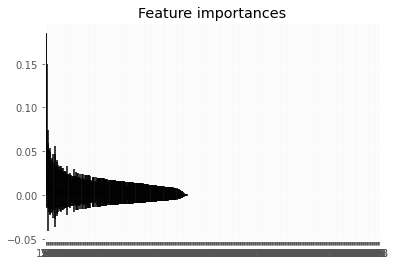

In [57]:
random_forest_best_model

importances = random_forest_best_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest_best_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest



Feature ranking:
1. feature 120 (0.085668)
2. feature 26 (0.084377)
3. feature 52 (0.079034)
4. feature 12 (0.022371)
5. feature 39 (0.016494)
6. feature 149 (0.016344)
7. feature 302 (0.016030)
8. feature 174 (0.013164)
9. feature 45 (0.011767)
10. feature 107 (0.011096)
11. feature 230 (0.010865)
12. feature 53 (0.010496)
13. feature 455 (0.009886)
14. feature 25 (0.009748)
15. feature 28 (0.009469)
16. feature 40 (0.008734)
17. feature 376 (0.008607)
18. feature 347 (0.008294)
19. feature 42 (0.007880)
20. feature 138 (0.007833)
21. feature 434 (0.007698)
22. feature 15 (0.007418)
23. feature 310 (0.007384)
24. feature 78 (0.007358)
25. feature 17 (0.007088)
26. feature 258 (0.006770)
27. feature 381 (0.006599)
28. feature 92 (0.006295)
29. feature 70 (0.006081)
30. feature 24 (0.006034)
31. feature 239 (0.005958)
32. feature 387 (0.005691)
33. feature 414 (0.005610)
34. feature 161 (0.005550)
35. feature 182 (0.005520)
36. feature 294 (0.005447)
37. feature 460 (0.005288)
38. featu

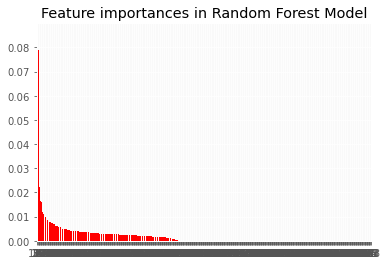

In [78]:
importances = random_forest_best_model.feature_importances_
std = np.std([random_forest_best_model.feature_importances_ for tree in random_forest_best_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances in Random Forest Model")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

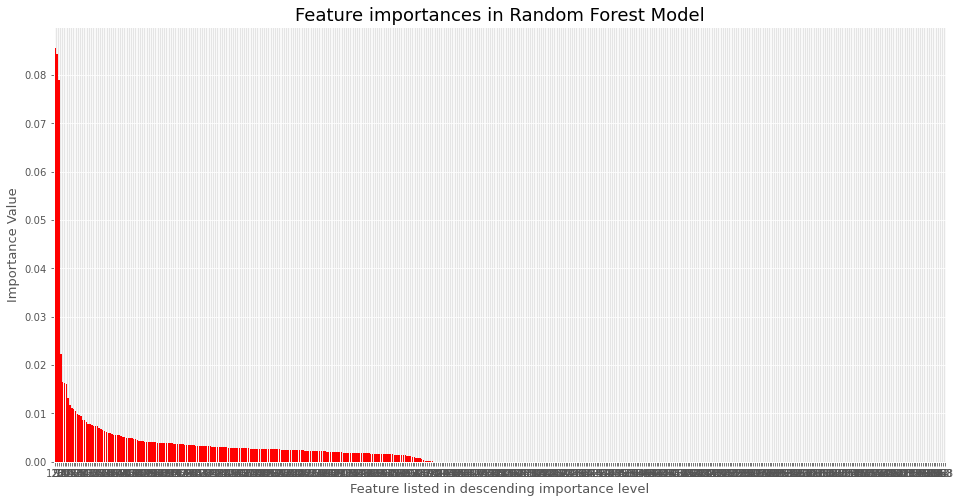

In [79]:
plt.figure(figsize = (16, 8))
plt.title("Feature importances in Random Forest Model", fontsize = 18)

plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature listed in descending importance level", fontsize = 13)
plt.ylabel("Importance Value", fontsize = 13)
plt.savefig("random_forest_feature_importance.png", dpi=200)
plt.show()

In [76]:
X_test.iloc[:,120]



1769    0.5995
1027    0.4971
1399   -0.7847
306    -1.0864
1858    0.1082
         ...  
1822    1.6898
12      0.0823
516    -0.8768
1490    0.0840
1192    0.1912
Name: aurka, Length: 256, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
# X_train, X_test, y_train, y_test = train_test_split(X, y)
thresholds = [.62, .625, .63, .635, .64, .645, .65, .655, .66]
results = {}
for threshold in thresholds:
    regressor = LogisticRegression(penalty='l1',
                                   class_weight = 'balanced',
                                   solver='liblinear')
    regressor.fit(X_train, y_train)
    yhat_probs = regressor.predict_proba(X_test)[:,1]
    preds = np.where(yhat_probs > threshold, 1, 0)
#     pd.DataFrame(data=[f1_score(y_test, preds), recall_score(y_test, preds),
#                    precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
#              index=["f1_score", "recall", "precision", "roc_auc_score"])
#     yhat = (yhat_probs >= threshold).astype(int)
#     results[f'threshold {threshold}'] = regressor.score(X_train,y_train)
    results[f'threshold {threshold}'] = [('F1 Score', round(f1_score(y_test,preds), 2)),
                                        ('Accuracy Score', round(accuracy_score(y_test,preds),2)),
                                        ('AUC Score', round(roc_auc_score(y_test,preds),2))]
results

In [103]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
# X_train, X_test, y_train, y_test = train_test_split(X, y)
thresholds = [.1, .15, .2, .25, .3, .4, .45, .50, .6]
results = {}
for threshold in thresholds:
    regressor = LogisticRegression(penalty='l1',
                                   class_weight = 'balanced',
                                   solver='liblinear')
    regressor.fit(X_train, y_train)
    yhat_probs = regressor.predict_proba(X_test)[:,1]
    preds = np.where(yhat_probs > threshold, 1, 0)
    results[f'threshold {threshold}'] = [('F1 Score',round(f1_score(y_test,preds), 2)),
                                        ('Accuracy Score', round(accuracy_score(y_test,preds),2)),
                                        ('AUC Score', round(roc_auc_score(y_test,preds),2))]
results

{'threshold 0.1': [('F1 Score', 0.46),
  ('Accuracy Score', 0.42),
  ('AUC Score', 0.51)],
 'threshold 0.15': [('F1 Score', 0.48),
  ('Accuracy Score', 0.48),
  ('AUC Score', 0.54)],
 'threshold 0.2': [('F1 Score', 0.48),
  ('Accuracy Score', 0.52),
  ('AUC Score', 0.56)],
 'threshold 0.25': [('F1 Score', 0.45),
  ('Accuracy Score', 0.51),
  ('AUC Score', 0.54)],
 'threshold 0.3': [('F1 Score', 0.46),
  ('Accuracy Score', 0.54),
  ('AUC Score', 0.55)],
 'threshold 0.4': [('F1 Score', 0.43),
  ('Accuracy Score', 0.54),
  ('AUC Score', 0.54)],
 'threshold 0.45': [('F1 Score', 0.42),
  ('Accuracy Score', 0.55),
  ('AUC Score', 0.54)],
 'threshold 0.5': [('F1 Score', 0.42),
  ('Accuracy Score', 0.57),
  ('AUC Score', 0.55)],
 'threshold 0.6': [('F1 Score', 0.41),
  ('Accuracy Score', 0.58),
  ('AUC Score', 0.55)]}

In [213]:
logistic2_best_model.predict_proba(X_test)[:,1]



thresholds = [.1, .15, .2, .25, .3, .4, .45, .50, .6]
results = {}
for threshold in thresholds:
#     regressor = LogisticRegression(penalty='l1',
#                                    class_weight = 'balanced',
#                                    solver='liblinear')
#     logistic2_best_model.fit(X_train, y_train)
    yhat_probs = logistic2_best_model.predict_proba(X_test)[:,1]
    preds = np.where(yhat_probs > threshold, 1, 0)
    results[f'threshold {threshold}'] = [('F1 Score',round(f1_score(y_test,preds), 2)),
                                        ('Accuracy Score', round(accuracy_score(y_test,preds),2)),
                                        ('AUC Score', round(roc_auc_score(y_test,preds),2)),
                                        ('Recall Score', round(recall_score(y_test,preds),2))]
results
# preds = np.where(yhat_probs > threshold, 1, 0)
# results[f'threshold {threshold}'] = [('F1 Score',round(f1_score(y_test,preds), 2)), 
#                                     ('Accuracy Score', round(accuracy_score(y_test,preds),2)), 
#                                     ('AUC Score', round(roc_auc_score(y_test,preds),2)),
#                                     ('Recall Score', round(recall_score(y_test,preds),2))]
                                    

{'threshold 0.1': [('F1 Score', 0.49),
  ('Accuracy Score', 0.33),
  ('AUC Score', 0.5),
  ('Recall Score', 1.0)],
 'threshold 0.15': [('F1 Score', 0.5),
  ('Accuracy Score', 0.33),
  ('AUC Score', 0.5),
  ('Recall Score', 1.0)],
 'threshold 0.2': [('F1 Score', 0.5),
  ('Accuracy Score', 0.34),
  ('AUC Score', 0.51),
  ('Recall Score', 1.0)],
 'threshold 0.25': [('F1 Score', 0.5),
  ('Accuracy Score', 0.34),
  ('AUC Score', 0.51),
  ('Recall Score', 1.0)],
 'threshold 0.3': [('F1 Score', 0.5),
  ('Accuracy Score', 0.37),
  ('AUC Score', 0.52),
  ('Recall Score', 0.98)],
 'threshold 0.4': [('F1 Score', 0.51),
  ('Accuracy Score', 0.47),
  ('AUC Score', 0.57),
  ('Recall Score', 0.86)],
 'threshold 0.45': [('F1 Score', 0.52),
  ('Accuracy Score', 0.54),
  ('AUC Score', 0.6),
  ('Recall Score', 0.77)],
 'threshold 0.5': [('F1 Score', 0.51),
  ('Accuracy Score', 0.59),
  ('AUC Score', 0.61),
  ('Recall Score', 0.65)],
 'threshold 0.6': [('F1 Score', 0.4),
  ('Accuracy Score', 0.66),
  ('AU

In [135]:
mrna1.akr1c4


587     0.4681
505    -0.2038
1555    0.1609
597     1.0390
848    -0.6290
         ...  
236     1.5534
979     0.0044
902    -0.5746
564    -1.0192
317     0.0165
Name: akr1c4, Length: 1704, dtype: float64

In [137]:
column_drop_list = ['akr1c4','pdgfrb', 'tgfbr2', 'col6a3', 'gata3','eif4e','pdgfra','cdk1','col12a1','e2f2','zfp36l1', 'stat2','lama2' ,'hsd17b11','aurka', 'setd1a', 'ppp2cb', 
 'hdac2' ,'itgav', 'erbb3', 'aph1a' ,'cdc25a' ,'smarcc2', 'chek1','jak1', 'bcl2' ,'hsd17b6', 'stat1', 'map4','ep300','tgfb3', 'notch1','mmp2','ccne1', 'myc','foxo1', 
 'cbfb' 'csf1r'  'bmpr2' 'palld' 'ccnb1' 'pdpk1' 'adgra2' 'gsk3b' 'map2k1' 'sf3b1' 'dab2' 'prkd1' 'kmt2c' 'e2f3' 'epcam' 
 'spry2', 'cdkn2a' ,'aph1b' ,'ccnd2', 'mapt' ,'tnk2', 'igf1', 'ncor2', 'arid1a' ,'ar' ,'kdm3a','dtx3', 'klrg1', 'stat5a' ,'tsc2', 'ran' ] 

In [ ]:
# dropping 'akr1c4' at index: 432
# dropping 'pdgfrb' at index: 232
# dropping 'tgfbr2' at index: 267
# dropping 'col6a3' at index: 331
#  ['akr1c4','pdgfrb', 'tgfbr2', 'col6a3', 'gata3','eif4e','pdgfra','cdk1','col12a1','e2f2','zfp36l1', 'stat2','lama2' ,'hsd17b11','aurka', 'setd1a', 'ppp2cb', 
#  'hdac2' ,'itgav', 'erbb3', 'aph1a' ,'cdc25a' ,'smarcc2', 'chek1','jak1', 'bcl2' ,'hsd17b6', 'stat1', 'map4','ep300','tgfb3', 'notch1','mmp2','ccne1', 'myc','foxo1', 
#  'cbfb' 'csf1r'  'bmpr2' 'palld' 'ccnb1' 'pdpk1' 'adgra2' 'gsk3b' 'map2k1' 'sf3b1' 'dab2' 'prkd1' 'kmt2c' 'e2f3' 'epcam' 
#  'spry2', 'cdkn2a' ,'aph1b' ,'ccnd2', 'mapt' ,'tnk2', 'igf1', 'ncor2', 'arid1a' ,'ar' ,'kdm3a','dtx3', 'klrg1', 'stat5a' ,'tsc2', 'ran' ] 

In [165]:
def drop_columns_in_lst(df, lst):
    for i in df.columns:
        if i in lst:
            print(i)
            df.drop(columns = [i], inplace = True)
    return df

In [166]:
mrna1_copy = mrna1.copy()

In [150]:
mrna1_copy.shape

(1704, 489)

In [151]:
lst = ['akr1c4']

In [167]:
df_vif_test = drop_columns_in_lst(mrna1_copy, column_drop_list)

cdk1
ccne1
cdc25a
ccnd2
cdkn2a
myc
e2f2
jak1
stat1
stat2
stat5a
aph1a
aph1b
dtx3
ep300
hdac2
ncor2
notch1
aurka
bcl2
chek1
eif4e
erbb3
foxo1
igf1
itgav
mmp2
pdgfra
pdgfrb
tgfb3
tgfbr2
tsc2
arid1a
gata3
map4
mapt
col12a1
col6a3
kdm3a
klrg1
lama2
ppp2cb
setd1a
smarcc2
zfp36l1
akr1c4
ar
hsd17b11
hsd17b6
ran
tnk2


In [168]:
df_vif_test.shape

(1704, 438)

In [163]:
len(column_drop_list)

52

In [169]:
df_vif_test.to_csv(r'/Users/cp/Documents/dsi/capstone2/capstone2/data/VIF_ready_df.csv', index = False)

In [170]:
df_vif_test['death_from_cancer'] = 


AttributeError: 'DataFrame' object has no attribute 'death_from_cancer'

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
587,-0.1963,0.9719,0.9539,0.2162,-1.5089,-2.1215,-1.3138,1.5796,-2.3792,0.1179,...,0.3578,-0.8158,-0.4569,-0.1086,-0.1265,-0.6283,-0.3529,-0.3821,-0.5126,-0.6521
505,-0.4686,-0.3299,0.9451,1.0407,0.3979,-1.3356,0.4317,0.1415,-0.8611,-0.1977,...,-0.1517,0.1647,0.2840,0.5090,-0.8882,-0.7251,0.6023,-0.3646,0.0278,-0.5810
1555,-0.7510,-0.7402,0.0095,-0.9640,-0.1853,-1.6366,-0.4075,0.0711,0.2337,-1.0026,...,0.0910,-1.5029,0.6851,-0.2898,-1.1775,0.7887,0.2797,2.4866,0.4362,1.5401
597,-1.0981,0.8055,-0.7268,-0.3705,-0.6490,1.2291,0.7013,-0.3847,-1.5986,-0.1455,...,1.1186,-0.2810,-0.5468,0.9734,0.1281,0.8676,-1.5113,-0.9104,-0.0158,-0.8271
848,0.7848,-0.3631,-1.0916,-1.0844,-1.5489,1.7379,-0.8013,-1.5256,-1.6627,-2.4994,...,0.0423,-0.1776,-1.0444,-3.2028,1.6446,0.4142,-1.0315,-0.6967,0.4126,-0.6690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,-0.7409,-0.5378,-1.1054,0.3454,0.5465,-0.5482,0.6663,-0.8061,1.1580,-1.2843,...,0.2523,-0.7180,0.4448,-0.7685,0.6235,-1.0950,-1.3931,0.1116,0.4005,2.2408
979,-1.1791,0.2061,-0.6906,1.1909,-0.6028,0.0193,-0.7066,-0.8460,0.8521,1.1152,...,-0.6764,-0.2359,-0.5447,1.2397,-0.6940,-0.0944,0.1742,-0.4224,-0.3538,-0.6395
902,0.6199,1.5865,1.4499,1.0206,-0.0843,-1.4706,0.1384,-0.7174,-0.6664,0.2897,...,-0.6947,-0.8604,0.1061,-0.4794,0.4129,0.8962,0.1676,-0.6055,0.5475,-0.7016
564,0.4670,1.9303,-0.0923,2.0163,-1.0900,-0.9410,-0.3857,-2.6887,-1.4730,-1.1766,...,-0.1978,0.3657,-0.9468,-0.5793,-0.4237,0.2870,-1.2957,-0.5544,-1.0656,-0.6982


In [172]:
df_vif_test

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,spry2,srd5a1,srd5a2,srd5a3,st7,star,tulp4,ugt2b15,ugt2b17,ugt2b7
587,-0.1963,0.9719,0.9539,0.2162,-1.5089,-2.1215,-1.3138,1.5796,-2.3792,0.1179,...,0.2718,0.3578,-0.8158,-0.4569,-0.1086,-0.1265,-0.3529,-0.3821,-0.5126,-0.6521
505,-0.4686,-0.3299,0.9451,1.0407,0.3979,-1.3356,0.4317,0.1415,-0.8611,-0.1977,...,0.4352,-0.1517,0.1647,0.2840,0.5090,-0.8882,0.6023,-0.3646,0.0278,-0.5810
1555,-0.7510,-0.7402,0.0095,-0.9640,-0.1853,-1.6366,-0.4075,0.0711,0.2337,-1.0026,...,0.6468,0.0910,-1.5029,0.6851,-0.2898,-1.1775,0.2797,2.4866,0.4362,1.5401
597,-1.0981,0.8055,-0.7268,-0.3705,-0.6490,1.2291,0.7013,-0.3847,-1.5986,-0.1455,...,0.5513,1.1186,-0.2810,-0.5468,0.9734,0.1281,-1.5113,-0.9104,-0.0158,-0.8271
848,0.7848,-0.3631,-1.0916,-1.0844,-1.5489,1.7379,-0.8013,-1.5256,-1.6627,-2.4994,...,-0.7368,0.0423,-0.1776,-1.0444,-3.2028,1.6446,-1.0315,-0.6967,0.4126,-0.6690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,-0.7409,-0.5378,-1.1054,0.3454,0.5465,-0.5482,0.6663,-0.8061,1.1580,-1.2843,...,-0.0875,0.2523,-0.7180,0.4448,-0.7685,0.6235,-1.3931,0.1116,0.4005,2.2408
979,-1.1791,0.2061,-0.6906,1.1909,-0.6028,0.0193,-0.7066,-0.8460,0.8521,1.1152,...,0.2796,-0.6764,-0.2359,-0.5447,1.2397,-0.6940,0.1742,-0.4224,-0.3538,-0.6395
902,0.6199,1.5865,1.4499,1.0206,-0.0843,-1.4706,0.1384,-0.7174,-0.6664,0.2897,...,-0.4232,-0.6947,-0.8604,0.1061,-0.4794,0.4129,0.1676,-0.6055,0.5475,-0.7016
564,0.4670,1.9303,-0.0923,2.0163,-1.0900,-0.9410,-0.3857,-2.6887,-1.4730,-1.1766,...,-0.1990,-0.1978,0.3657,-0.9468,-0.5793,-0.4237,-1.2957,-0.5544,-1.0656,-0.6982


In [296]:
X2 = df_vif_test

In [297]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.15, random_state=1, stratify = y)

# For VIF adjusted dataframe REPEATED CODE CLEAN UP AFTER AND REMEMBER

In [311]:
# logistic_randomsearch.fit(X2_train, y2_train)
# print(f"Best logistic Parameters: {logistic_randomsearch.best_params_}")
# print(f"Best logistic Model: {logistic_randomsearch.best_estimator_}")
# print(f"Best logistic Score: {logistic_randomsearch.best_score_:.4f}")

logistic2_randomsearch.fit(X2_train, y2_train)
print(f"Best logistic Parameters: {logistic2_randomsearch.best_params_}")
print(f"Best logistic Model: {logistic2_randomsearch.best_estimator_}")
print(f"Best logistic Score: {logistic2_randomsearch.best_score_:.4f}")

# logistic2_gridsearch.fit(X_train, y_train)
# print(f"Best GRID logistic Parameters: {logistic2_gridsearch.best_params_}")
# print(f"Best GRID logistic Model: {logistic2_gridsearch.best_estimator_}")
# print(f"Best GRID logistic Score: {logistic2_gridsearch.best_score_:.4f}")




# svm_randomsearch.fit(X2_train, y2_train)
# print(f"Best svm Parameters: {svm_randomsearch.best_params_}")
# print(f"Best svm Model: {svm_randomsearch.best_estimator_}")
# print(f"Best svm Score: {svm_randomsearch.best_score_:.4f}")

gradient_randomsearch.fit(X2_train, y2_train)
print(f"Best Gradient Parameters: {gradient_randomsearch.best_params_}")
print(f"Best Gradient Model: {gradient_randomsearch.best_estimator_}")
print(f"Best Gradient Score: {gradient_randomsearch.best_score_:.4f}")

random_foreset_randomsearch.fit(X2_train, y2_train)
print(f"Best Random Forest Parameters: {random_foreset_randomsearch.best_params_}")
print(f"Best Random Forest Model: {random_foreset_randomsearch.best_estimator_}")
print(f"Best Random Forest Score: {random_foreset_randomsearch.best_score_:.4f}")


ada_randomsearch.fit(X2_train, y2_train)
print(f"Best Random adaboost Parameters: {ada_randomsearch.best_params_}")
print(f"Best Random adaboost Model: {ada_randomsearch.best_estimator_}")
print(f"Best Random adaboost Score: {ada_randomsearch.best_score_:.4f}")

SGD_randomsearch.fit(X2_train, y2_train)
print(f"Best Random SGD Parameters: {SGD_randomsearch.best_params_}")
print(f"Best Random SGD Model: {SGD_randomsearch.best_estimator_}")
print(f"Best Random SGD Score: {SGD_randomsearch.best_score_:.4f}")


/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best logistic Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': 'balanced', 'C': 0.0305}
Best logistic Model: LogisticRegression(C=0.0305, class_weight='balanced', penalty='l1',
                   solver='liblinear')
Best logistic Score: 0.6396
Best Gradient Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.1}
Best Gradient Model: GradientBoostingClassifier(max_depth=4, max_features='sqrt')
Best Gradient Score: 0.6389
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 8, 'class_weight': 'balanced', 'bootstrap': False}
Best Random Forest Model: RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=8,
                       max_features='log2', min_samples_leaf=2,
                       min_samples_split=4)
Best Random Forest Score: 0.6591


/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Best Random adaboost Parameters: {'n_estimators': 250, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(class_weight='balanced')}
Best Random adaboost Model: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                   learning_rate=0.1, n_estimators=250)
Best Random adaboost Score: 0.5465
Best Random SGD Parameters: {'penalty': 'l1', 'max_iter': 25, 'loss': 'modified_huber', 'class_weight': 'balanced', 'alpha': 0.001}
Best Random SGD Model: SGDClassifier(alpha=0.001, class_weight='balanced', loss='modified_huber',
              max_iter=25, penalty='l1')
Best Random SGD Score: 0.5754


/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [312]:
# logistic_best_model = logistic_randomsearch.best_estimator_
# logistic_y_hats = logistic_best_model.predict(X2_test)
# print(f"logistic ROC Score = {roc_auc_score(y_test, logistic_y_hats):.4f}")

logistic2_randomsearch = logistic2_randomsearch.best_estimator_
logistic2_y_hats = logistic2_best_model.predict(X2_test)
print(f"logistic2 ROC Score = {roc_auc_score(y_test, logistic2_y_hats):.4f}")

# logisticGrid_best_model = logistic2_gridsearch.best_estimator_
# logisticGrid_y_hats = logisticGrid_best_model.predict(X2_test)
# print(f"logistic GRID ROC Score = {roc_auc_score(y_test, logisticGrid_y_hats):.4f}")

# svm_best_model = svm_randomsearch.best_estimator_
# svm_y_hats = svm_best_model.predict(X2_test)
# print(f"SVM ROC Score = {roc_auc_score(y_test, svm_y_hats):.4f}")

gradient_best_model = gradient_randomsearch.best_estimator_
gy_hats = gradient_best_model.predict(X2_test)
print(f"Gradient ROC Score = {roc_auc_score(y_test, gy_hats):.4f}")

random_forest_best_model = random_foreset_randomsearch.best_estimator_
ry_hats = random_forest_best_model.predict(X2_test)
print(f"Random Forest ROC Score = {roc_auc_score(y_test, ry_hats):.4f}")




ada_boost_best_model = ada_randomsearch.best_estimator_
ada_y_hats = ada_boost_best_model.predict(X2_test)
print(f"Random Adaboost ROC Score = {roc_auc_score(y_test, ada_y_hats):.4f}")

SGD_best_model = SGD_randomsearch.best_estimator_
SGD_y_hats = SGD_best_model.predict(X2_test)
print(f"Random SGD ROC Score = {roc_auc_score(y_test, SGD_y_hats):.4f}")


logistic2 ROC Score = 0.6213
Gradient ROC Score = 0.5876
Random Forest ROC Score = 0.5970
Random Adaboost ROC Score = 0.5457
Random SGD ROC Score = 0.5468


In [314]:
logistic2_best_model.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.02000047,  0.        ,  0.        ,
        -0.0353286 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.13116256,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.05742293,  0.024935  ,  0.        ,
        -0.0320276 ,  0.        , -0.11291044,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00331794,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [317]:
# mrna1 = mrna_df[200:]
mrna1.to_csv(r'../data/rna_jupyternotebook_df_wednesday.csv', index = False)

In [318]:
mnra1.death_from _cancer

SyntaxError: invalid syntax (<ipython-input-318-6d53442f1cb9>, line 1)

NameError: name 'mrna' is not defined

In [321]:
X.shape

(1704, 489)

In [322]:
y.shape

(1704,)

In [323]:
X

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
587,-0.1963,0.9719,0.9539,0.2162,-1.5089,-2.1215,-1.3138,1.5796,-2.3792,0.1179,...,0.3578,-0.8158,-0.4569,-0.1086,-0.1265,-0.6283,-0.3529,-0.3821,-0.5126,-0.6521
505,-0.4686,-0.3299,0.9451,1.0407,0.3979,-1.3356,0.4317,0.1415,-0.8611,-0.1977,...,-0.1517,0.1647,0.2840,0.5090,-0.8882,-0.7251,0.6023,-0.3646,0.0278,-0.5810
1555,-0.7510,-0.7402,0.0095,-0.9640,-0.1853,-1.6366,-0.4075,0.0711,0.2337,-1.0026,...,0.0910,-1.5029,0.6851,-0.2898,-1.1775,0.7887,0.2797,2.4866,0.4362,1.5401
597,-1.0981,0.8055,-0.7268,-0.3705,-0.6490,1.2291,0.7013,-0.3847,-1.5986,-0.1455,...,1.1186,-0.2810,-0.5468,0.9734,0.1281,0.8676,-1.5113,-0.9104,-0.0158,-0.8271
848,0.7848,-0.3631,-1.0916,-1.0844,-1.5489,1.7379,-0.8013,-1.5256,-1.6627,-2.4994,...,0.0423,-0.1776,-1.0444,-3.2028,1.6446,0.4142,-1.0315,-0.6967,0.4126,-0.6690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,-0.7409,-0.5378,-1.1054,0.3454,0.5465,-0.5482,0.6663,-0.8061,1.1580,-1.2843,...,0.2523,-0.7180,0.4448,-0.7685,0.6235,-1.0950,-1.3931,0.1116,0.4005,2.2408
979,-1.1791,0.2061,-0.6906,1.1909,-0.6028,0.0193,-0.7066,-0.8460,0.8521,1.1152,...,-0.6764,-0.2359,-0.5447,1.2397,-0.6940,-0.0944,0.1742,-0.4224,-0.3538,-0.6395
902,0.6199,1.5865,1.4499,1.0206,-0.0843,-1.4706,0.1384,-0.7174,-0.6664,0.2897,...,-0.6947,-0.8604,0.1061,-0.4794,0.4129,0.8962,0.1676,-0.6055,0.5475,-0.7016
564,0.4670,1.9303,-0.0923,2.0163,-1.0900,-0.9410,-0.3857,-2.6887,-1.4730,-1.1766,...,-0.1978,0.3657,-0.9468,-0.5793,-0.4237,0.2870,-1.2957,-0.5544,-1.0656,-0.6982


In [329]:
# y.to_csv(r'../data/target_death_short_col.csv', index = False)

1704